# KMeans Algorithm on text-classification

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pylab as pl

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_files
from sklearn.decomposition import PCA

In [16]:
DATA_DIR = 'data/bbc'
random_state = 0
data = load_files(DATA_DIR, random_state = random_state, decode_error = 'replace', encoding = 'utf-8')
df = pd.DataFrame(list(zip(data['data'], data['target'])), columns = ['text', 'labels'])
df.head(3)

,text,labels
0,Warning over tsunami aid website\n\nNet users ...,4
1,"GM, Ford cut output as sales fall\n\nUS car fi...",0
2,Minimum wage increased to £5.05\n\nThe minimum...,2


In [17]:
vec = TfidfVectorizer('english')
vec.fit(df.text.values)
features = vec.transform(df.text.values)

In [18]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters = 5, init='k-means++')
model.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [19]:
model.predict(features)

array([1, 4, 1, ..., 1, 3, 1])

In [20]:
model.batch_size

100

In [21]:
model.cluster_centers_

array([[0.00000000e+00, 1.94402234e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.17001125e-04, 8.30137008e-03, 6.16910934e-05, ...,
        8.85982218e-05, 1.28460305e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.63463408e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.77488164e-03],
       [0.00000000e+00, 9.66182543e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [22]:
model.inertia_

1947.330359333754

In [23]:
model.n_clusters

5

Principle Component analysis 

In [26]:
pca = PCA(n_components = 5, random_state = random_state)
reduced_features = pca.fit_transform(features.toarray())
reduced_features

array([[ 6.67215798e-02, -9.26121563e-02,  8.55929089e-02,
         1.90816199e-02, -2.70176381e-02],
       [-1.26600905e-01, -1.55964104e-01, -7.58290113e-02,
        -6.23886541e-02,  8.11809340e-02],
       [ 1.99111384e-01, -4.02341438e-02,  9.75087358e-02,
         3.41620928e-02,  8.20808156e-02],
       ...,
       [-9.77537259e-02,  5.74175279e-02,  1.26743782e-04,
         1.53864323e-01, -1.62544928e-02],
       [-2.86232672e-02,  1.71916018e-02, -6.36555394e-02,
         2.99281295e-01, -5.15349756e-02],
       [-5.59066337e-02,  1.56019866e-01,  2.27242578e-02,
        -7.88695136e-02,  9.58955603e-02]])

In [27]:
reduced_centers = pca.transform(model.cluster_centers_)
reduced_centers

array([[ 0.07687277, -0.03500705, -0.05597815, -0.0153723 ,  0.03261941],
       [ 0.01287487,  0.01010095,  0.0104941 , -0.01287424, -0.00928373],
       [ 0.01191894, -0.07198245,  0.08355436,  0.05790042, -0.07596528],
       [-0.11047222,  0.02178253, -0.07423077,  0.21711258, -0.05639599],
       [-0.03917312, -0.13406538, -0.06797688, -0.02409299,  0.14549118]])

# DBSCAN Algorithm

In [28]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 3, min_samples=20)
db.fit(features)

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)

In [29]:
db.components_

<2221x29409 sparse matrix of type '<class 'numpy.float64'>'
	with 448251 stored elements in Compressed Sparse Row format>

In [30]:
db.eps

3

In [31]:
db.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
db.core_sample_indices_[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

# Hierarichal Agglomerative Clustering

In [34]:
from sklearn.cluster import AgglomerativeClustering
hi = AgglomerativeClustering(n_clusters = 5)
hi.fit(reduced_features)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

In [35]:
hi.labels_

array([1, 0, 1, ..., 4, 4, 2], dtype=int64)

In [36]:
hi.n_clusters_

5

In [37]:
hi.n_components_

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``n_components_`` attribute was deprecated in favor of ``n_connected_components_`` in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=DeprecationWarning)


1

In [38]:
hi.linkage

'ward'

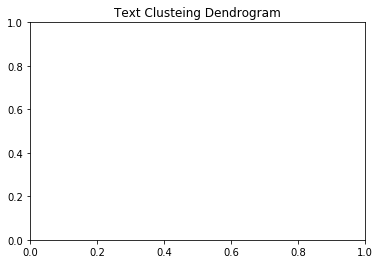

In [ ]:
import scipy.cluster.hierarchy as sc
plt.title('Text Clusteing Dendrogram')
plt.figure(figsize = (12, 8))
dend = sc.dendrogram(sc.linkage(reduced_features, method='ward'))
plt.axhline(y=2, color='r', linestyle='--')